# 잡케어 추천 알고리즘 경진대회

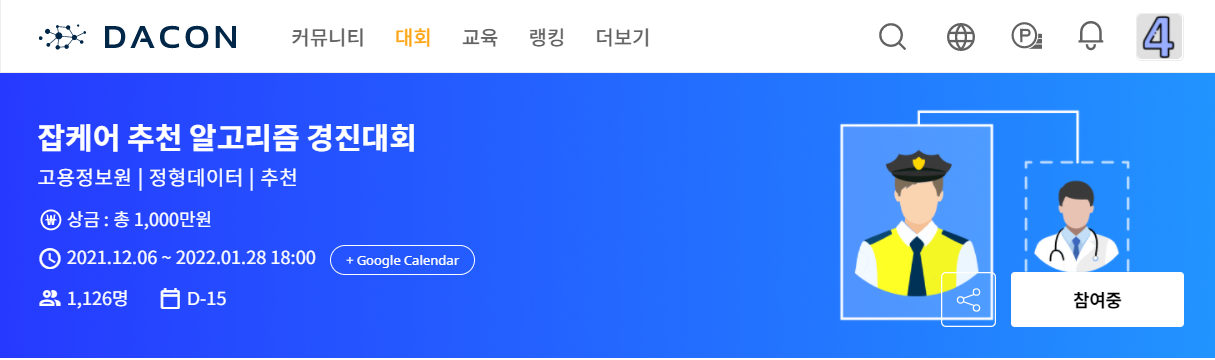

* 잡케어는 인공지능 기술을 활용하여, 일자리를 탐색하는 구직자의 이력서로 직무역량을 자동 분석한 후, 구직자가 훈련, 자격, 일자리 상담에 활용할 수 있도록 지원하는 시스템이다.

* 한국고용정보원은 구인구직 빅데이터 기반으로 커리어 관리 서비스인 잡케어 서비스를 구축하고 있다. 

* 본 대회를 통해 데이터를 기반으로 개인별 맞춤형 컨텐츠 추천 모델을 만들고자 한다.

=> 잡케어 서비스에 적용 가능한 추천 알고리즘 개발

# [ 변수 살펴보기 ]

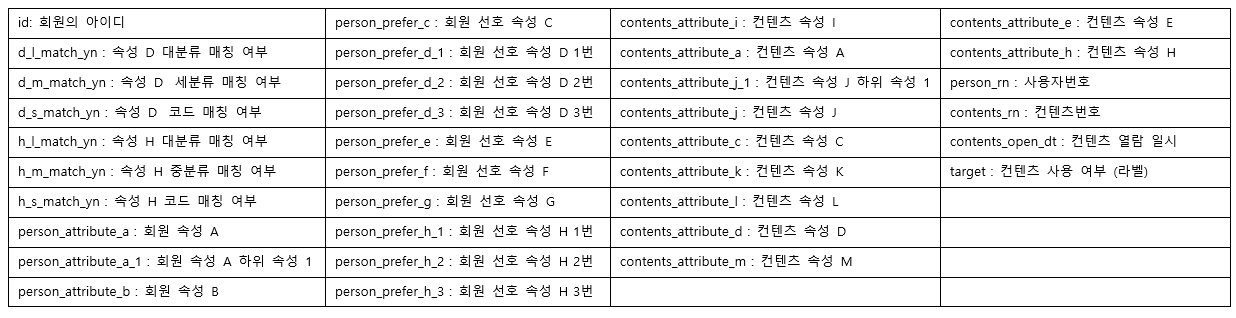

# [ Data 전처리 ]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from datetime import datetime

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ESAA-2/프로젝트')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

d_code = pd.read_csv('속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('속성_L_코드.csv', index_col=0).T.to_dict()

print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 35)
test_data.shape:  (46404, 34)


In [ ]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [ ]:
train_data.drop('id', axis=1, inplace=True)

##  D code - 세부 정보를 train data에 저장.

In [ ]:
d_code

{4: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 4, '속성 D 소분류코드': 3, '속성 D 중분류코드': 2},
 5: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 5, '속성 D 소분류코드': 3, '속성 D 중분류코드': 2},
 7: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 7, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 8: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 9: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 10: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 11: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 12: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 13: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 14: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 14, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 15: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 15, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 17: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 17, '속성 D 소분류코드': 16, '속성 D 중분류코드': 2},
 18: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 18, '속성 D 소분류코드': 16, '속성 D 중분류코드': 2},
 19: {'속성 D 대분류코드': 1, '

In [ ]:
train_data['person_prefer_d_1_n'] = train_data['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
train_data['person_prefer_d_1_s'] = train_data['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
train_data['person_prefer_d_1_m'] = train_data['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
train_data['person_prefer_d_1_l'] = train_data['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

In [ ]:
train_data['person_prefer_d_2_n'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
train_data['person_prefer_d_2_s'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
train_data['person_prefer_d_2_m'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
train_data['person_prefer_d_2_l'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

In [ ]:
train_data['person_prefer_d_3_n'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
train_data['person_prefer_d_3_s'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
train_data['person_prefer_d_3_m'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
train_data['person_prefer_d_3_l'] = train_data['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

In [ ]:
train_data['contents_attribute_d_n'] = train_data['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
train_data['contents_attribute_d_s'] = train_data['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
train_data['contents_attribute_d_m'] = train_data['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
train_data['contents_attribute_d_l'] = train_data['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

## H code - 세부 정보를 train data에 저장

In [ ]:
h_code

{2: {'속성 H 대분류코드': 1, '속성 H 중분류코드': 315},
 4: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 316},
 5: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 317},
 6: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 318},
 7: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 319},
 8: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 320},
 9: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 321},
 10: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 322},
 11: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 323},
 12: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 324},
 13: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 325},
 14: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 326},
 15: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 327},
 16: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 328},
 17: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 329},
 18: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 330},
 19: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 331},
 20: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 332},
 21: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 333},
 22: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 334},
 23: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 335},
 24: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 336},
 25: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 337},
 26: {'속성 H 대분류코드'

In [ ]:
train_data['person_prefer_h_1_l'] = train_data['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
train_data['person_prefer_h_1_m'] = train_data['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
train_data['person_prefer_h_2_l'] = train_data['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
train_data['person_prefer_h_2_m'] = train_data['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
train_data['person_prefer_h_3_l'] = train_data['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
train_data['person_prefer_h_3_m'] = train_data['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

train_data['contents_attribute_h_l'] = train_data['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
train_data['contents_attribute_h_m'] = train_data['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

## L Code - 세부 정보를 train data에 저장

In [ ]:
l_code

{1: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 1, '속성 L 소분류코드': 1, '속성 L 중분류코드': 1},
 2: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 2, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 3: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 3, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 4: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 3, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 5: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 6: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 7: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 8: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 9: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 9, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 10: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 9, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 11: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 9, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 12: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 12, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 13: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 12, '속성 L 소분류코드': 2, '속성 L 중분류코드

In [ ]:
train_data['contents_attribute_l_n'] = train_data['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
train_data['contents_attribute_l_s'] = train_data['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
train_data['contents_attribute_l_m'] = train_data['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
train_data['contents_attribute_l_l'] = train_data['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

In [ ]:
print("train_data.shape: ", train_data.shape)

train_data.shape:  (501951, 62)


## [ 날짜 데이터 전처리 ] - contents_open_dt 데이터

* 년, 달, 일 데이터를 남기고 시간, 분 데이터는 제거.

In [ ]:
train_data['contents_open_dt']

0         2020-01-17 12:09:36
1         2020-06-18 17:48:52
2         2020-07-08 20:00:10
3         2020-01-13 18:09:34
4         2020-03-09 20:39:22
                 ...         
501946    2020-03-13 12:55:52
501947    2020-01-20 11:51:51
501948    2020-08-05 17:27:24
501949    2020-06-15 09:23:21
501950    2020-05-25 14:34:48
Name: contents_open_dt, Length: 501951, dtype: object

In [ ]:
train_data['contents_open_dt'] = train_data['contents_open_dt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
train_data['contents_open_dt']

0        2020-01-17 12:09:36
1        2020-06-18 17:48:52
2        2020-07-08 20:00:10
3        2020-01-13 18:09:34
4        2020-03-09 20:39:22
                 ...        
501946   2020-03-13 12:55:52
501947   2020-01-20 11:51:51
501948   2020-08-05 17:27:24
501949   2020-06-15 09:23:21
501950   2020-05-25 14:34:48
Name: contents_open_dt, Length: 501951, dtype: datetime64[ns]

In [ ]:
train_data['year'] = train_data['contents_open_dt'].apply(lambda x: x.timetuple()[0])
train_data['month'] = train_data['contents_open_dt'].apply(lambda x: x.timetuple()[1])
train_data['day'] = train_data['contents_open_dt'].apply(lambda x: x.timetuple()[2])
train_data[['contents_open_dt','year','month','day']].head()

,contents_open_dt,year,month,day
0,2020-01-17 12:09:36,2020,1,17
1,2020-06-18 17:48:52,2020,6,18
2,2020-07-08 20:00:10,2020,7,8
3,2020-01-13 18:09:34,2020,1,13
4,2020-03-09 20:39:22,2020,3,9


In [ ]:
print("train_data.shape: ", train_data.shape)

train_data.shape:  (501951, 65)


## 결측치 처리

In [ ]:
train_data.isnull().sum()

d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
                         ..
contents_attribute_l_m    0
contents_attribute_l_l    0
year                      0
month                     0
day                       0
Length: 65, dtype: int64

In [ ]:
(train_data.isnull().sum() == 0).value_counts()

True    65
dtype: int64

=> 결측치가 존재하지 않음.

# [ Heatmap ]

## 전체

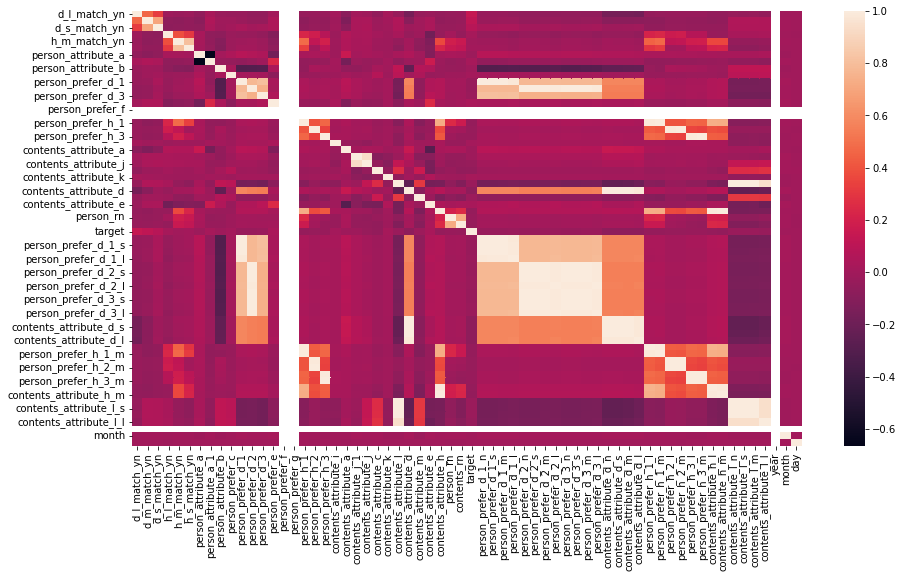

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr())

* 공백 원인

In [ ]:
train_data['person_prefer_g'].value_counts()

1    501951
Name: person_prefer_g, dtype: int64

In [ ]:
train_data['person_prefer_f'].value_counts()

1    501951
Name: person_prefer_f, dtype: int64

In [ ]:
one = []
for i in train_data.columns:
  if len(train_data[i].value_counts())==1:
    one.append(i)
one

['person_prefer_f', 'person_prefer_g', 'year']

=> 모든 관측치의 year, person_prefer_f, person_prefer_g 값이 동일함.

In [ ]:
train_data.drop(['person_prefer_f', 'person_prefer_g', 'year'], axis=1, inplace=True)
train_data.shape

## Target 변수와의 상관계수

In [ ]:
corr = pd.DataFrame(train_data.corr()['target'])
corr['abs_corr'] = abs(corr['target'])
corr = corr.sort_values(by=['abs_corr'], axis = 0, ascending=False).dropna()[1:]
corr

,target,abs_corr
d_l_match_yn,0.142670,0.142670
d_m_match_yn,0.118406,0.118406
d_s_match_yn,0.087591,0.087591
contents_attribute_d_l,-0.072809,0.072809
contents_attribute_d_m,-0.071532,0.071532
contents_attribute_d_s,-0.069434,0.069434
contents_attribute_d_n,-0.069355,0.069355
contents_attribute_d,-0.069321,0.069321
contents_attribute_c,-0.050670,0.050670
contents_attribute_h_m,-0.047628,0.047628
